<h1 style="color: #001a79;"> Wisconsin Breast Cancer Analysis Notebook</h1>

<h3 style="color: #001a79;">For this notebook you will need the following packages:</h3>

In [19]:
# numpy offers useful arrays and random number generators. 
import numpy as np

# pandas is good for data manipulation and analysis. 
import pandas as pd

# matplotlib is a plotting library, and pyplot is its easy-to-use module.
import matplotlib.pyplot as plt

# seaborn is a fancier plotting library. 
import seaborn as sns

# Mains statistics package.
import scipy.stats as ss

<h2 style="color: #001a79;">Introduction</h2>

<hr style="border-top: 1px solid #001a79;" />

Breast cancer is a common cancer in Ireland with more than 3,500 women and approximately 35 men  diagnosed with breast cancer each year. Breast cancer is when cells in the breast grow and divide in an uncontrolled way. This creates a mass of tissue called a tumor. Signs of breast cancer can include feeling a lump in the breast, a change in the size of the breast and changes to the skin of the breasts. Breast cancer is treated with surgery, radiotherapy, chemotherapy, hormone therapy and targeted therapies, depending on the type.

<img src="content/breast-cancer.jpg" alt="Breast cancer" style="width: 350px;"/> 

Sources:<br>
<a href="https://www.cancer.ie/cancer-information-and-support/cancer-types/breast-cancer#:~:text=Each%20year%20in%20Ireland%2C%20more,therapies%2C%20depending%20on%20the%20type." target="_blank">Irish Cancer Society: Breast Cancer</a><br>
<a href="https://my.clevelandclinic.org/health/diseases/3986-breast-cancer" target="_blank">Cleveland Clinic: Breast Cancer</a>

The <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29" target="_blank">Wisconsin-Breast Cancer (Diagnostics) dataset</a> (WBC) from UCI machine learning repository is a classification dataset that records the measurements for breast cancer cases. There are two classes of diagnosis, Benign and Malignant:

<table style="border-collapse: collapse; width: 80%; height: 261px;" border="1">
<tbody>
<tr>
<td style="width: 50%; text-align: center;">
<h2><strong>1. Benign</strong></h2>
</td>
<td style="width: 50%; text-align: center;">
<h2><strong>2. Malignant</strong></h2>
</td>
</tr>
<tr>
<td style="width: 50%; text-align: center;">
<h3>Grow slowly and have distant borders.</h3>
</td>
<td style="width: 50%; text-align: center;">
<h3>Can grow quickly and have irregular borders.</h3>
</td>
</tr>
<tr>
<td style="width: 50%; text-align: center;">
<h3>Do not invade surrounding tissue.</h3>
</td>
<td style="width: 50%; text-align: center;">
<h3>Often invade surrounding tissue.</h3>
</td>
</tr>
<tr>
<td style="width: 50%; text-align: center;">
<h3>Do not invade other parts of the body.</h3>
</td>
<td style="width: 50%; text-align: center;">
<h3>Can spread to other parts of the body through a process called metastasis.&nbsp;</h3>
</td>
</tr>
</tbody>
</table>

<img src="content/tumortype.PNG" alt="Benign versus Malignant" style="width: 550px;"/> 

<a href="https://jamanetwork.com/journals/jamaoncology/fullarticle/2768634" target="_blank">JAMA Oncology: Benign vs Malignant Tumors</a><br>
<a href="https://www.technologynetworks.com/cancer-research/articles/benign-vs-malignant-tumors-364765" target="_blank">Technology Networks (Cancer Research): Benign vs Malignant Tumors</a>

<h2 style="color: #001a79;">Breast Cancer Wisconsin (Diagnostic) Dataset</h2>

<hr style="border-top: 1px solid #001a79;" />

### Background

The diagnosis of breast tumors has traditionally been performed by a full biopsy. This process involves the extraction of sample cells or tissues for examination to determine the presence or extent of a disease. Dr. William H. Wolberg, physician at the University Of Wisconsin Hospital used fine needle aspirations (FNAs) to extract a small amount of breast tissue or fluid from the suspicious area with a thin, hollow needle and is then checked for cancer cells. On the samples taken, Dr. Wolberg used an interactive computer system to evaluate and diagnose the sample based on cytologic features derived directly from a digital scan of the FNA slides.

The program initialises active contour models, known as snakes, near the boundaries of a set of cell nuclei. The customized snakes are deformed to the exact shape of the nuclei. This allows for precise, automated analysis of nuclear size, shape and texture using a curve-fitting algorithm. Ten such features are computed for each nucleus, and the mean value, largest (or 'worst') value and standard error of each feature are found over the range of isolated cells. 569 patients provided the data to develop this system. 

Sources:<br>
<a href="https://www.cancer.org/cancer/breast-cancer/screening-tests-and-early-detection/breast-biopsy/fine-needle-aspiration-biopsy-of-the-breast.html#:~:text=During%20a%20fine%20needle%20aspiration,needle%20biopsy%20is%20often%20preferred" target="_blank">Cancer.org: Fine Needle Aspiration (FNA) of the Breast</a><br>
<a href="https://www.sciencedirect.com/science/article/abs/pii/030438359490099X" target="_blank">William H.Wolberg - Machine learning techniques to diagnose breast cancer from image-processed nuclear features of fine needle aspirates</a>

### Importing the Data

Source: <a href="https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data" target="_blank">Kaggle: Breast Cancer Wisconsin (Diagnostic) Data Set</a>

In [20]:
# Import data
df = pd.read_csv("data.csv")

In [21]:
# Show first 5 rows 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### About the Data

In [22]:
# No. of rows x No. of columns
df.shape

(569, 33)

In [23]:
# Column names 
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [24]:
# Column types 
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

The data is made up of 569 rows, each representing a sample. 

It's 33 columns are made up of:
1. The patient's ID and their diagnosis. These are types ints and strings respectively. 
2. Ten real-valued features that are computed for each cell nucleus:
    - **Radius** - mean of distances from center to points on the perimeter
    - **Texture** - standard deviation of gray-scale values
    - **Perimeter** 
    - **Area**
    - **Smoothness** - local variation in radius lengths
    - **Compactness** - $\frac{perimeter^2}{area - 1.0}$
    - **Concavity** - severity of concave portions of the contour
    - **Concave Points** - number of concave portions of the contour
    - **Symmetry**
    - **Fractal dimension** - coastline approximation - 1
    
For each of the 10 features, the mean value, standard error and worst value are calculated. 

All feature values are floats.

3. Missing attribute values: none. 

### Data Cleaning 

For the analysis and machine learning we do not need the `id` and `Unnamed: 32`. 

In [25]:
# Drop columns 'id' and 'Unnamed: 32'
df.drop(columns = ['id', 'Unnamed: 32'], axis = 1, inplace = True)

# Show first 5 rows 
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Check that the df has any null or missing values. 

In [26]:
# Return the sum of nulls for the df 
df.isnull().sum().sum()

0

In [27]:
# Return the sum of na for the df 
df.isna().sum().sum()

0

### Explore Data

In [28]:
# Benign and malignant counts 
diagnosis_counts = df['diagnosis'].value_counts()
diagnosis_counts

B    357
M    212
Name: diagnosis, dtype: int64

In [29]:
# Benign and malignant percentages 
diagnosis_percents = round((df['diagnosis'].value_counts(normalize=True)) * 100, 1)
diagnosis_percents

B    62.7
M    37.3
Name: diagnosis, dtype: float64

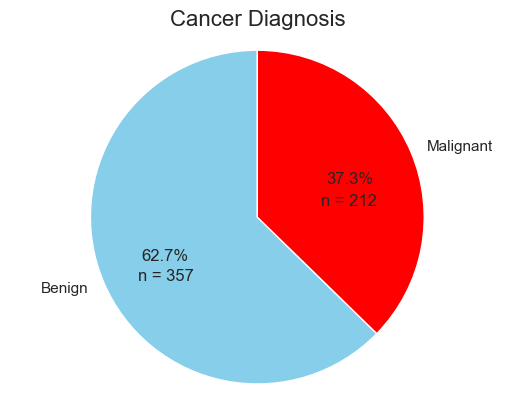

In [30]:
# Graph style
sns.set(style="darkgrid")

# Set diagnosis colors and labels
diagnosis_cols = ['skyblue', 'red']
labels = 'Benign', 'Malignant'

# Plot a pie chart Benign vs malignant diagnosis
fig, ax = plt.subplots()
ax.pie(diagnosis_percents, labels = labels, colors = diagnosis_cols, autopct = '%1.1f%%', startangle = 90)
ax.axis('equal')  

# Add title 
plt.title("Cancer Diagnosis", fontsize=16)

# Add count values to plot 
benign_n = f'n = {diagnosis_counts[0]}'
malignant_n = f'n = {diagnosis_counts[1]}'
ax.text(-0.55, -0.35, benign_n, horizontalalignment='center', verticalalignment='center')
ax.text(0.55, 0.10, malignant_n, horizontalalignment='center', verticalalignment='center');

#### As seen above, 62.7% of the samples in the dataset were diagnosed as Benign while the remaining 37.3% we diagnosed as Malignant. 

### Group Data - Means, Standard Errors and Worsts 

In [31]:
# Create a list with the mean features columns names
mean_features = list(df.columns[1:11])

# Add 'diagnosis to the beginning of the list' https://stackoverflow.com/a/17911209
mean_features.insert(0, 'diagnosis')

# Show list 
mean_features

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

In [32]:
# Repeat for se features 
se_features = list(df.columns[11:21])
se_features.insert(0, 'diagnosis')
se_features

['diagnosis',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se']

In [33]:
# Repeat for worst features 
worst_features = list(df.columns[21:31])
worst_features.insert(0, 'diagnosis')
worst_features

['diagnosis',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [34]:
# Create individual dataframes for each group 
mean_features_df = df[mean_features]
se_features_df = df[se_features]
worst_features_df = df[worst_features]

## Features - Radius, Texture and Perimeter (Mean)

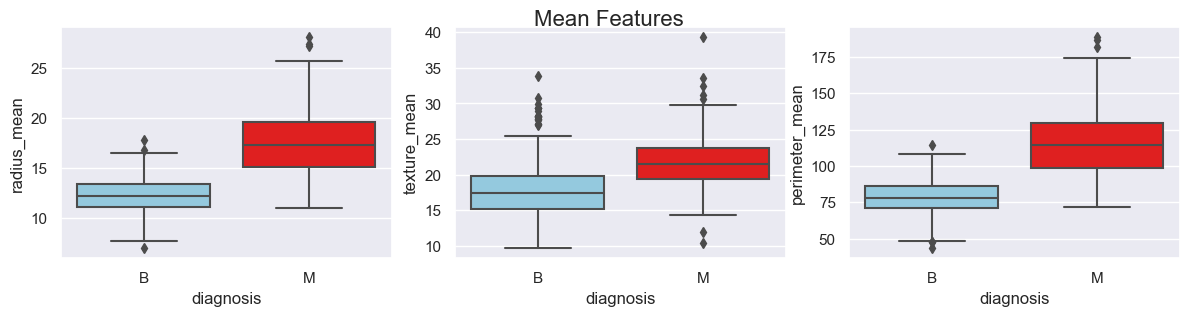

In [35]:
# Create 3 plots horizontally
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3)) 

# Fix labels
plt.tight_layout()

# Title
fig.suptitle("Mean Features", fontsize=16)

# Boxplots for each feature by diagnosis
sns.boxplot(data=df, x="diagnosis", y="radius_mean", ax=ax1, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="texture_mean", ax=ax2, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="perimeter_mean", ax=ax3, palette=diagnosis_cols, order=['B','M']);

In [36]:
# Calculate mean, standard deviation, min, median and max by diagnosis for mean features
mean_features_by_diagnosis = mean_features_df.groupby('diagnosis').agg([np.mean, np.std, np.min, np.median, np.max])

In [37]:
print('radius_mean')
print(mean_features_by_diagnosis['radius_mean'])
print('-----------------------------------------------------')
print('texture_mean')
print(mean_features_by_diagnosis['texture_mean'])
print('-----------------------------------------------------')
print('perimeter_mean')
print(mean_features_by_diagnosis['perimeter_mean'])

radius_mean
                mean       std    amin  median   amax
diagnosis                                            
B          12.146524  1.780512   6.981  12.200  17.85
M          17.462830  3.203971  10.950  17.325  28.11
-----------------------------------------------------
texture_mean
                mean       std   amin  median   amax
diagnosis                                           
B          17.914762  3.995125   9.71   17.39  33.81
M          21.604906  3.779470  10.38   21.46  39.28
-----------------------------------------------------
perimeter_mean
                 mean        std   amin  median   amax
diagnosis                                             
B           78.075406  11.807438  43.79   78.18  114.6
M          115.365377  21.854653  71.90  114.20  188.5


In [38]:
radius_mean_b = df[df['diagnosis'] == 'B']['radius_mean']
radius_mean_m = df[df['diagnosis'] == 'M']['radius_mean']
t, p_radius_mean = ss.stats.ttest_ind(radius_mean_b, radius_mean_m, equal_var=False)
print(f'Radius Mean P-Value: {p_radius_mean:.3f}')
      
texture_mean_b = df[df['diagnosis'] == 'B']['texture_mean']
texture_mean_m = df[df['diagnosis'] == 'M']['texture_mean']
t, p_texture_mean = ss.stats.ttest_ind(texture_mean_b, texture_mean_m, equal_var=False)
print(f'Texture Mean P-Value: {p_texture_mean:.3f}')

perimeter_mean_b = df[df['diagnosis'] == 'B']['perimeter_mean']
perimeter_mean_m = df[df['diagnosis'] == 'M']['perimeter_mean']
t, p_perimeter_mean = ss.stats.ttest_ind(perimeter_mean_b, perimeter_mean_m, equal_var=False)
print(f'perimeter Mean P-Value: {p_perimeter_mean:.3f}')

Radius Mean P-Value: 0.000
Texture Mean P-Value: 0.000
perimeter Mean P-Value: 0.000


#### The mean of Radius Mean, Texture Mean and Perimeter Mean are significantly greater in Malignant diagnosed tumors versus Benign diagnosed tumors. 

## Features - Radius, Texture and Perimeter (SE)

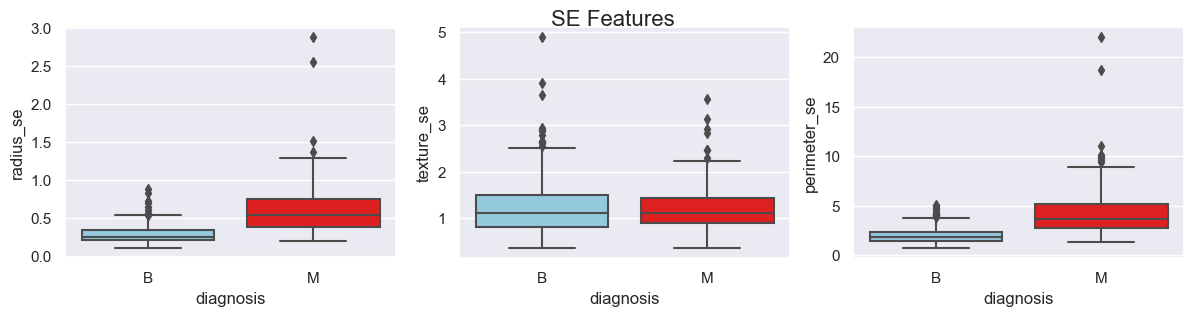

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3)) 
plt.tight_layout()

fig.suptitle("SE Features", fontsize=16)

sns.boxplot(data=df, x="diagnosis", y="radius_se", ax=ax1, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="texture_se", ax=ax2, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="perimeter_se", ax=ax3, palette=diagnosis_cols, order=['B','M']);

In [40]:
# Calculate mean, standard deviation, min, median and max by diagnosis for SE features
se_features_by_diagnosis = se_features_df.groupby('diagnosis').agg([np.mean, np.std, np.min, np.median, np.max])

In [41]:
print('radius_se')
print(se_features_by_diagnosis['radius_se'])
print('-----------------------------------------------------')
print('texture_se')
print(se_features_by_diagnosis['texture_se'])
print('-----------------------------------------------------')
print('perimeter_se')
print(se_features_by_diagnosis['perimeter_se'])

radius_se
               mean       std    amin  median    amax
diagnosis                                            
B          0.284082  0.112570  0.1115  0.2575  0.8811
M          0.609083  0.345039  0.1938  0.5472  2.8730
-----------------------------------------------------
texture_se
               mean       std    amin  median   amax
diagnosis                                           
B          1.220380  0.589180  0.3602  1.1080  4.885
M          1.210915  0.483178  0.3621  1.1025  3.568
-----------------------------------------------------
perimeter_se
               mean       std   amin  median    amax
diagnosis                                           
B          2.000321  0.771169  0.757  1.8510   5.118
M          4.323929  2.568546  1.334  3.6795  21.980


In [42]:
radius_se_b = df[df['diagnosis'] == 'B']['radius_se']
radius_se_m = df[df['diagnosis'] == 'M']['radius_se']
t, p_radius_se = ss.stats.ttest_ind(radius_se_b, radius_se_m, equal_var=False)
print(f'Radius SE P-Value: {p_radius_se:.3f}')
      
texture_se_b = df[df['diagnosis'] == 'B']['texture_se']
texture_se_m = df[df['diagnosis'] == 'M']['texture_se']
t, p_texture_se = ss.stats.ttest_ind(texture_se_b, texture_se_m, equal_var=False)
print(f'Texture SE P-Value: {p_texture_se:.3f}')

perimeter_se_b = df[df['diagnosis'] == 'B']['perimeter_se']
perimeter_se_m = df[df['diagnosis'] == 'M']['perimeter_se']
t, p_perimeter_se = ss.stats.ttest_ind(perimeter_se_b, perimeter_se_m, equal_var=False)
print(f'Perimeter SE P-Value: {p_perimeter_se:.3f}')

Radius SE P-Value: 0.000
Texture SE P-Value: 0.835
Perimeter SE P-Value: 0.000


#### The mean of Radius SE and Perimeter SE are significantly greater in Malignant diagnosed tumors versus Benign diagnosed tumors. No difference for Texture SE between the two diagnosis. 

## Features - Radius, Texture and Perimeter (Worst)

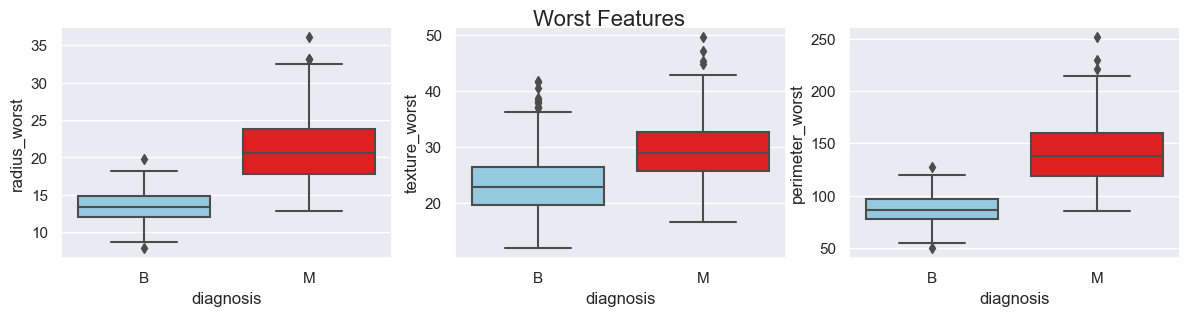

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3)) 
plt.tight_layout()

fig.suptitle("Worst Features", fontsize=16)

sns.boxplot(data=df, x="diagnosis", y="radius_worst", ax=ax1, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="texture_worst", ax=ax2, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="perimeter_worst", ax=ax3, palette=diagnosis_cols, order=['B','M']);

In [44]:
# Calculate mean, standard deviation, min, median and max by diagnosis for worst features
worst_features_by_diagnosis = worst_features_df.groupby('diagnosis').agg([np.mean, np.std, np.min, np.median, np.max])

In [45]:
print('radius_worst')
print(worst_features_by_diagnosis['radius_worst'])
print('-----------------------------------------------------')
print('texture_worst')
print(worst_features_by_diagnosis['texture_worst'])
print('-----------------------------------------------------')
print('perimeter_worst')
print(worst_features_by_diagnosis['perimeter_worst'])

radius_worst
                mean       std   amin  median   amax
diagnosis                                           
B          13.379801  1.981368   7.93   13.35  19.82
M          21.134811  4.283569  12.84   20.59  36.04
-----------------------------------------------------
texture_worst
                mean       std   amin  median   amax
diagnosis                                           
B          23.515070  5.493955  12.02  22.820  41.78
M          29.318208  5.434804  16.67  28.945  49.54
-----------------------------------------------------
perimeter_worst
                 mean        std   amin  median   amax
diagnosis                                             
B           87.005938  13.527091  50.41   86.92  127.1
M          141.370330  29.457055  85.10  138.00  251.2


In [46]:
radius_worst_b = df[df['diagnosis'] == 'B']['radius_worst']
radius_worst_m = df[df['diagnosis'] == 'M']['radius_worst']
t, p_radius_worst = ss.stats.ttest_ind(radius_worst_b, radius_worst_m, equal_var=False)
print(f'Radius Worst P-Value: {p_radius_se:.3f}')
      
texture_worst_b = df[df['diagnosis'] == 'B']['texture_worst']
texture_worst_m = df[df['diagnosis'] == 'M']['texture_worst']
t, p_texture_worst = ss.stats.ttest_ind(texture_worst_b, texture_worst_m, equal_var=False)
print(f'Texture Worst P-Value: {p_texture_worst:.3f}')

perimeter_worst_b = df[df['diagnosis'] == 'B']['perimeter_worst']
perimeter_worst_m = df[df['diagnosis'] == 'M']['perimeter_worst']
t, p_perimeter_worst = ss.stats.ttest_ind(perimeter_worst_b, perimeter_worst_m, equal_var=False)
print(f'Perimeter Worst P-Value: {p_perimeter_worst:.3f}')

Radius Worst P-Value: 0.000
Texture Worst P-Value: 0.000
Perimeter Worst P-Value: 0.000


#### The mean of Radius Worst, Texture Worst and Perimeter Worst are significantly greater in Malignant diagnosed tumors versus Benign diagnosed tumors. 

## Features - Area, Smoothness and Compactness (Mean)

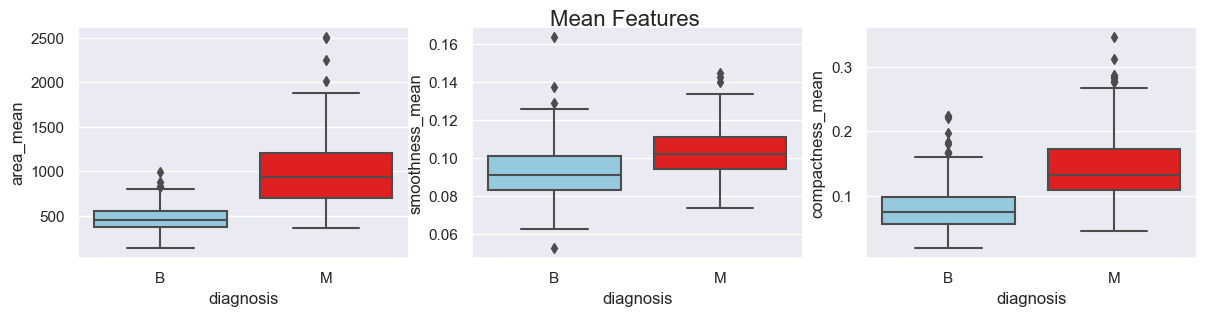

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3)) 
plt.tight_layout()

fig.suptitle("Mean Features", fontsize=16)

sns.boxplot(data=df, x="diagnosis", y="area_mean", ax=ax1, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="smoothness_mean", ax=ax2, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="compactness_mean", ax=ax3, palette=diagnosis_cols, order=['B','M']);

In [48]:
print('area_mean')
print(mean_features_by_diagnosis['area_mean'])
print('-----------------------------------------------------')
print('smoothness_mean')
print(mean_features_by_diagnosis['smoothness_mean'])
print('-----------------------------------------------------')
print('compactness_mean')
print(mean_features_by_diagnosis['compactness_mean'])

area_mean
                 mean         std   amin  median    amax
diagnosis                                               
B          462.790196  134.287118  143.5   458.4   992.1
M          978.376415  367.937978  361.6   932.0  2501.0
-----------------------------------------------------
smoothness_mean
               mean       std     amin   median    amax
diagnosis                                              
B          0.092478  0.013446  0.05263  0.09076  0.1634
M          0.102898  0.012608  0.07371  0.10220  0.1447
-----------------------------------------------------
compactness_mean
               mean       std     amin   median    amax
diagnosis                                              
B          0.080085  0.033750  0.01938  0.07529  0.2239
M          0.145188  0.053987  0.04605  0.13235  0.3454


In [49]:
area_mean_b = df[df['diagnosis'] == 'B']['area_mean']
area_mean_m = df[df['diagnosis'] == 'M']['area_mean']
t, p_area_mean = ss.stats.ttest_ind(area_mean_b, area_mean_m, equal_var=False)
print(f'Area Mean P-Value: {p_area_mean:.3f}')
      
smoothness_mean_b = df[df['diagnosis'] == 'B']['smoothness_mean']
smoothness_mean_m = df[df['diagnosis'] == 'M']['smoothness_mean']
t, p_smoothness_mean = ss.stats.ttest_ind(smoothness_mean_b, smoothness_mean_m, equal_var=False)
print(f'Smoothness Mean P-Value: {p_smoothness_mean:.3f}')

compactness_mean_b = df[df['diagnosis'] == 'B']['compactness_mean']
compactness_mean_m = df[df['diagnosis'] == 'M']['compactness_mean']
t, p_compactness_mean = ss.stats.ttest_ind(compactness_mean_b, compactness_mean_m, equal_var=False)
print(f'Compactness Mean P-Value: {p_compactness_mean:.3f}')

Area Mean P-Value: 0.000
Smoothness Mean P-Value: 0.000
Compactness Mean P-Value: 0.000


####  The mean of Area Mean, Smoothness Mean and Compactness Mean are significantly greater in Malignant diagnosed tumors versus Benign diagnosed tumors. 

## Features - Area, Smoothness and Compactness (SE)

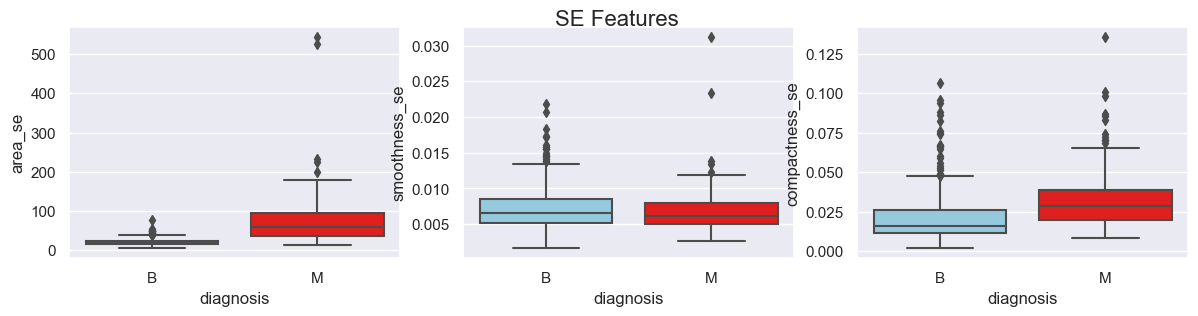

In [50]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3)) 
plt.tight_layout()

fig.suptitle("SE Features", fontsize=16)

sns.boxplot(data=df, x="diagnosis", y="area_se", ax=ax1, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="smoothness_se", ax=ax2, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="compactness_se", ax=ax3, palette=diagnosis_cols, order=['B','M']);

In [51]:
print('area_se')
print(se_features_by_diagnosis['area_se'])
print('-----------------------------------------------------')
print('smoothness_se')
print(se_features_by_diagnosis['smoothness_se'])
print('-----------------------------------------------------')
print('compactness_se')
print(se_features_by_diagnosis['compactness_se'])

area_se
                mean        std    amin  median    amax
diagnosis                                              
B          21.135148   8.843472   6.802  19.630   77.11
M          72.672406  61.355268  13.990  58.455  542.20
-----------------------------------------------------
smoothness_se
               mean       std      amin    median     amax
diagnosis                                                 
B          0.007196  0.003061  0.001713  0.006530  0.02177
M          0.006780  0.002890  0.002667  0.006209  0.03113
-----------------------------------------------------
compactness_se
               mean       std      amin   median    amax
diagnosis                                               
B          0.021438  0.016352  0.002252  0.01631  0.1064
M          0.032281  0.018387  0.008422  0.02859  0.1354


In [52]:
area_se_b = df[df['diagnosis'] == 'B']['area_se']
area_se_m = df[df['diagnosis'] == 'M']['area_se']
t, p_area_se = ss.stats.ttest_ind(area_se_b, area_se_m, equal_var=False)
print(f'Area SE P-Value: {p_area_se:.3f}')
      
smoothness_se_b = df[df['diagnosis'] == 'B']['smoothness_se']
smoothness_se_m = df[df['diagnosis'] == 'M']['smoothness_se']
t, p_smoothness_se = ss.stats.ttest_ind(smoothness_se_b, smoothness_se_m, equal_var=False)
print(f'Smoothness SE P-Value: {p_smoothness_se:.3f}')

compactness_se_b = df[df['diagnosis'] == 'B']['compactness_se']
compactness_se_m = df[df['diagnosis'] == 'M']['compactness_se']
t, p_compactness_se = ss.stats.ttest_ind(compactness_se_b, compactness_se_m, equal_var=False)
print(f'Compactness SE P-Value: {p_compactness_se:.3f}')

Area SE P-Value: 0.000
Smoothness SE P-Value: 0.105
Compactness SE P-Value: 0.000


####  The mean of Area SE and Compactness SE are significantly greater in Malignant diagnosed tumors versus Benign diagnosed tumors. No difference for Smoothness SE between the two diagnosis.

## Features - Area, Smoothness and Compactness (Worst)

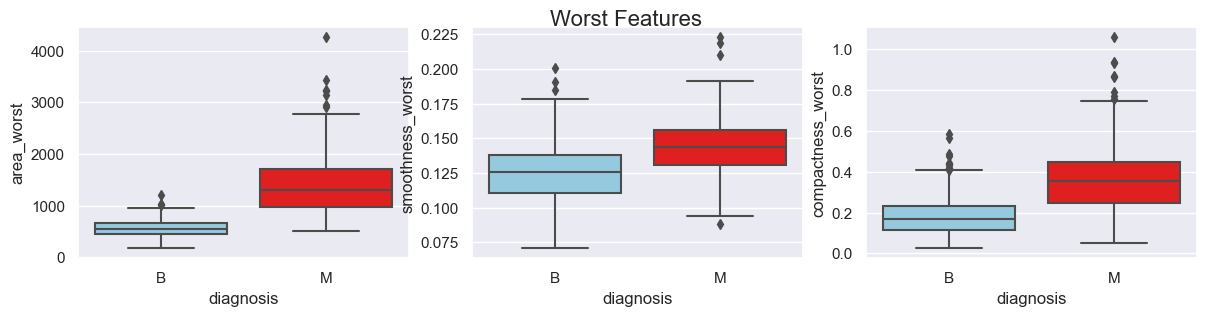

In [53]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3)) 
plt.tight_layout()

fig.suptitle("Worst Features", fontsize=16)

sns.boxplot(data=df, x="diagnosis", y="area_worst", ax=ax1, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="smoothness_worst", ax=ax2, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="compactness_worst", ax=ax3, palette=diagnosis_cols, order=['B','M']);

In [54]:
print('area_worst')
print(worst_features_by_diagnosis['area_worst'])
print('-----------------------------------------------------')
print('smoothness_worst')
print(worst_features_by_diagnosis['smoothness_worst'])
print('-----------------------------------------------------')
print('compactness_worst')
print(worst_features_by_diagnosis['compactness_worst'])

area_worst
                  mean         std   amin  median    amax
diagnosis                                                
B           558.899440  163.601424  185.2   547.4  1210.0
M          1422.286321  597.967743  508.1  1303.0  4254.0
-----------------------------------------------------
smoothness_worst
               mean       std     amin   median    amax
diagnosis                                              
B          0.124959  0.020013  0.07117  0.12540  0.2006
M          0.144845  0.021870  0.08822  0.14345  0.2226
-----------------------------------------------------
compactness_worst
               mean       std     amin   median    amax
diagnosis                                              
B          0.182673  0.092180  0.02729  0.16980  0.5849
M          0.374824  0.170372  0.05131  0.35635  1.0580


In [55]:
area_worst_b = df[df['diagnosis'] == 'B']['area_worst']
area_worst_m = df[df['diagnosis'] == 'M']['area_worst']
t, p_worst_mean = ss.stats.ttest_ind(area_worst_b, area_worst_m, equal_var=False)
print(f'Area Worst P-Value: {p_worst_mean:.3f}')
      
smoothness_worst_b = df[df['diagnosis'] == 'B']['smoothness_worst']
smoothness_worst_m = df[df['diagnosis'] == 'M']['smoothness_worst']
t, p_smoothness_worst = ss.stats.ttest_ind(smoothness_worst_b, smoothness_worst_m, equal_var=False)
print(f'Smoothness Worst P-Value: {p_smoothness_worst:.3f}')

compactness_worst_b = df[df['diagnosis'] == 'B']['compactness_worst']
compactness_worst_m = df[df['diagnosis'] == 'M']['compactness_worst']
t, p_compactness_worst = ss.stats.ttest_ind(compactness_worst_b, compactness_worst_m, equal_var=False)
print(f'Compactness Worst P-Value: {p_compactness_worst:.3f}')

Area Worst P-Value: 0.000
Smoothness Worst P-Value: 0.000
Compactness Worst P-Value: 0.000


#### The mean of Area Worst, Smoothness Worst and Compactness Worst are significantly greater in Malignant diagnosed tumors versus Benign diagnosed tumors. 

## Features - Concavity, Concave Point, Symmetry and Fractal Dimension (Mean)

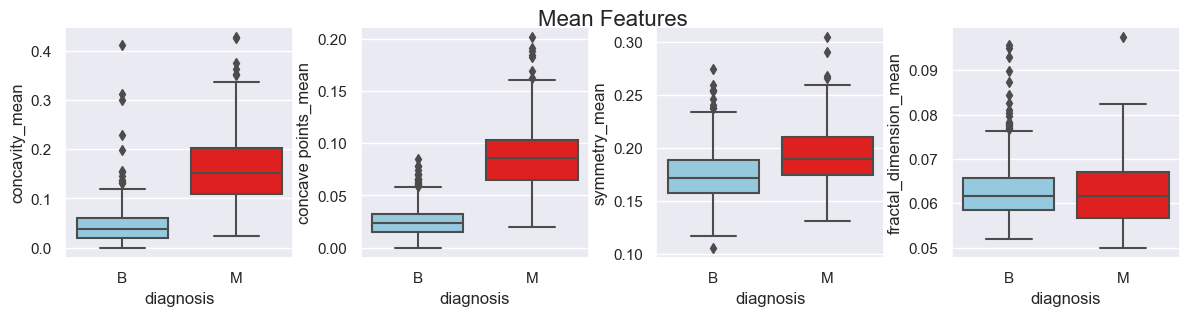

In [56]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 3)) 
plt.tight_layout()

fig.suptitle("Mean Features", fontsize=16)

sns.boxplot(data=df, x="diagnosis", y="concavity_mean", ax=ax1, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="concave points_mean", ax=ax2, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="symmetry_mean", ax=ax3, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="fractal_dimension_mean", ax=ax4, palette=diagnosis_cols, order=['B','M']);

In [57]:
print('concavity_mean')
print(mean_features_by_diagnosis['concavity_mean'])
print('-----------------------------------------------------')
print('concave points_mean')
print(mean_features_by_diagnosis['concave points_mean'])
print('-----------------------------------------------------')
print('symmetry_mean')
print(mean_features_by_diagnosis['symmetry_mean'])
print('-----------------------------------------------------')
print('fractal_dimension_mean')
print(mean_features_by_diagnosis['fractal_dimension_mean'])

concavity_mean
               mean       std     amin   median    amax
diagnosis                                              
B          0.046058  0.043442  0.00000  0.03709  0.4108
M          0.160775  0.075019  0.02398  0.15135  0.4268
-----------------------------------------------------
concave points_mean
               mean       std     amin   median     amax
diagnosis                                               
B          0.025717  0.015909  0.00000  0.02344  0.08534
M          0.087990  0.034374  0.02031  0.08628  0.20120
-----------------------------------------------------
symmetry_mean
               mean       std    amin  median    amax
diagnosis                                            
B          0.174186  0.024807  0.1060  0.1714  0.2743
M          0.192909  0.027638  0.1308  0.1899  0.3040
-----------------------------------------------------
fractal_dimension_mean
               mean       std     amin    median     amax
diagnosis                               

In [58]:
concavity_mean_b = df[df['diagnosis'] == 'B']['concavity_mean']
concavity_mean_m = df[df['diagnosis'] == 'M']['concavity_mean']
t, p_concavity_mean = ss.stats.ttest_ind(concavity_mean_b, concavity_mean_m, equal_var=False)
print(f'Concavity Mean P-Value: {p_concavity_mean:.3f}')
      
concave_points_mean_b = df[df['diagnosis'] == 'B']['concave points_mean']
concave_points_mean_m = df[df['diagnosis'] == 'M']['concave points_mean']
t, p_concave_points_mean = ss.stats.ttest_ind(concave_points_mean_b, concave_points_mean_m, equal_var=False)
print(f'Concave Points Mean P-Value: {p_concave_points_mean:.3f}')

symmetry_mean_b = df[df['diagnosis'] == 'B']['symmetry_mean']
symmetry_mean_m = df[df['diagnosis'] == 'M']['symmetry_mean']
t, p_symmetry_mean = ss.stats.ttest_ind(symmetry_mean_b, symmetry_mean_m, equal_var=False)
print(f'Symmetry Mean P-Value: {p_symmetry_mean:.3f}')

fractal_dimension_mean_b = df[df['diagnosis'] == 'B']['fractal_dimension_mean']
fractal_dimension_mean_m = df[df['diagnosis'] == 'M']['fractal_dimension_mean']
t, p_fractal_dimension_mean = ss.stats.ttest_ind(fractal_dimension_mean_b, fractal_dimension_mean_m, equal_var=False)
print(f'Fractal Dimension Mean P-Value: {p_fractal_dimension_mean:.3f}')

Concavity Mean P-Value: 0.000
Concave Points Mean P-Value: 0.000
Symmetry Mean P-Value: 0.000
Fractal Dimension Mean P-Value: 0.767


####  The mean of Concavity Mean, Concave Points Mean and Symmetry Mean are significantly greater in Malignant diagnosed tumors versus Benign diagnosed tumors. No difference for Fractal Dimension Mean between the two diagnosis.

## Features - Concavity, Concave Point, Symmetry and Fractal Dimension (SE)

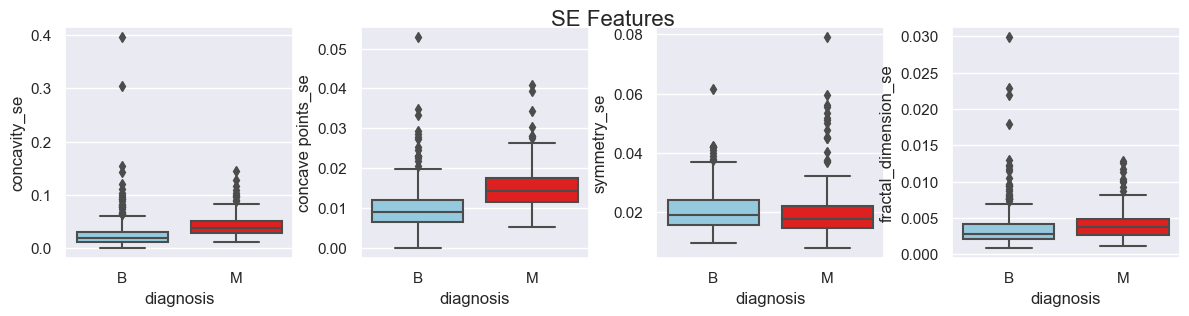

In [59]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 3)) 
plt.tight_layout()

fig.suptitle("SE Features", fontsize=16)

sns.boxplot(data=df, x="diagnosis", y="concavity_se", ax=ax1, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="concave points_se", ax=ax2, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="symmetry_se", ax=ax3, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="fractal_dimension_se", ax=ax4, palette=diagnosis_cols, order=['B','M']);

In [60]:
print('concavity_se')
print(se_features_by_diagnosis['concavity_se'])
print('-----------------------------------------------------')
print('concave points_se')
print(se_features_by_diagnosis['concave points_se'])
print('-----------------------------------------------------')
print('symmetry_se')
print(se_features_by_diagnosis['symmetry_se'])
print('-----------------------------------------------------')
print('fractal_dimension_se')
print(se_features_by_diagnosis['fractal_dimension_se'])

concavity_se
               mean       std     amin    median    amax
diagnosis                                               
B          0.025997  0.032918  0.00000  0.018400  0.3960
M          0.041824  0.021603  0.01101  0.037125  0.1438
-----------------------------------------------------
concave points_se
               mean       std      amin    median     amax
diagnosis                                                 
B          0.009858  0.005709  0.000000  0.009061  0.05279
M          0.015060  0.005517  0.005174  0.014205  0.04090
-----------------------------------------------------
symmetry_se
               mean       std      amin   median     amax
diagnosis                                                
B          0.020584  0.006999  0.009539  0.01909  0.06146
M          0.020472  0.010065  0.007882  0.01770  0.07895
-----------------------------------------------------
fractal_dimension_se
               mean       std      amin    median     amax
diagnosis          

In [61]:
concavity_se_b = df[df['diagnosis'] == 'B']['concavity_se']
concavity_se_m = df[df['diagnosis'] == 'M']['concavity_se']
t, p_concavity_se = ss.stats.ttest_ind(concavity_se_b, concavity_se_m, equal_var=False)
print(f'Concavity SE P-Value: {p_concavity_se:.3f}')
      
concave_points_se_b = df[df['diagnosis'] == 'B']['concave points_se']
concave_points_se_m = df[df['diagnosis'] == 'M']['concave points_se']
t, p_concave_points_se = ss.stats.ttest_ind(concave_points_se_b, concave_points_se_m, equal_var=False)
print(f'Concave Points SE P-Value: {p_concave_points_se:.3f}')

symmetry_se_b = df[df['diagnosis'] == 'B']['symmetry_se']
symmetry_se_m = df[df['diagnosis'] == 'M']['symmetry_se']
t, p_symmetry_se = ss.stats.ttest_ind(symmetry_se_b, symmetry_se_m, equal_var=False)
print(f'Symmetry SE P-Value: {p_symmetry_se:.3f}')

fractal_dimension_se_b = df[df['diagnosis'] == 'B']['fractal_dimension_se']
fractal_dimension_se_m = df[df['diagnosis'] == 'M']['fractal_dimension_se']
t, p_fractal_dimension_se = ss.stats.ttest_ind(fractal_dimension_se_b, fractal_dimension_se_m, equal_var=False)
print(f'Fractal Dimension SE P-Value: {p_fractal_dimension_se:.3f}')

Concavity SE P-Value: 0.000
Concave Points SE P-Value: 0.000
Symmetry SE P-Value: 0.887
Fractal Dimension SE P-Value: 0.042


####  The mean of Concavity SE,, Concave Points SE and Fractal Dimension SE are significantly greater in Malignant diagnosed tumors versus Benign diagnosed tumors. No difference for Symmetry SE between the two diagnosis.

## Features - Concavity, Concave Point, Symmetry and Fractal Dimension (Worst)

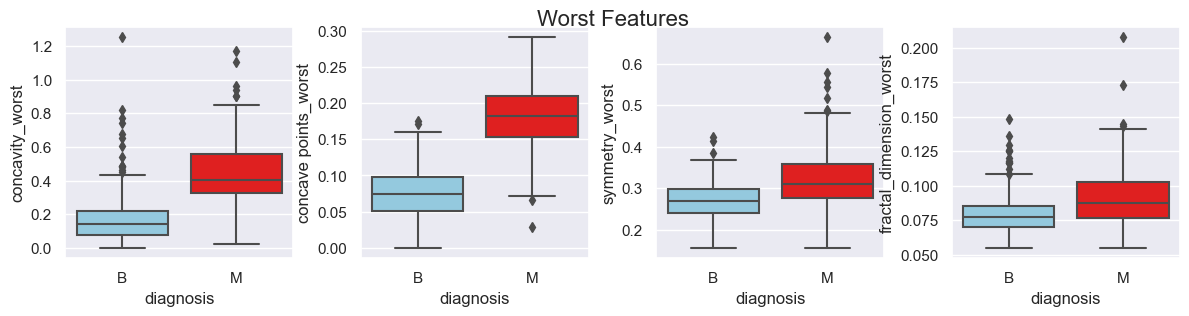

In [62]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 3)) 
plt.tight_layout()

fig.suptitle("Worst Features", fontsize=16)

sns.boxplot(data=df, x="diagnosis", y="concavity_worst", ax=ax1, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="concave points_worst", ax=ax2, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="symmetry_worst", ax=ax3, palette=diagnosis_cols, order=['B','M'])
sns.boxplot(data=df, x="diagnosis", y="fractal_dimension_worst", ax=ax4, palette=diagnosis_cols, order=['B','M']);

In [63]:
print('concavity_worst')
print(worst_features_by_diagnosis['concavity_worst'])
print('-----------------------------------------------------')
print('concave points_worst')
print(worst_features_by_diagnosis['concave points_worst'])
print('-----------------------------------------------------')
print('symmetry_worst')
print(worst_features_by_diagnosis['symmetry_worst'])
print('-----------------------------------------------------')
print('fractal_dimension_worst')
print(worst_features_by_diagnosis['fractal_dimension_worst'])

concavity_worst
               mean       std     amin  median   amax
diagnosis                                            
B          0.166238  0.140368  0.00000  0.1412  1.252
M          0.450606  0.181507  0.02398  0.4049  1.170
-----------------------------------------------------
concave points_worst
               mean       std     amin   median   amax
diagnosis                                             
B          0.074444  0.035797  0.00000  0.07431  0.175
M          0.182237  0.046308  0.02899  0.18200  0.291
-----------------------------------------------------
symmetry_worst
               mean       std    amin  median    amax
diagnosis                                            
B          0.270246  0.041745  0.1566  0.2687  0.4228
M          0.323468  0.074685  0.1565  0.3103  0.6638
-----------------------------------------------------
fractal_dimension_worst
               mean       std     amin   median    amax
diagnosis                                             

In [64]:
concavity_worst_b = df[df['diagnosis'] == 'B']['concavity_worst']
concavity_worst_m = df[df['diagnosis'] == 'M']['concavity_worst']
t, p_concavity_worst = ss.stats.ttest_ind(concavity_worst_b, concavity_worst_m, equal_var=False)
print(f'Concavity Worst P-Value: {p_concavity_worst:.3f}')
      
concave_points_worst_b = df[df['diagnosis'] == 'B']['concave points_worst']
concave_points_worst_m = df[df['diagnosis'] == 'M']['concave points_worst']
t, p_concave_points_worst = ss.stats.ttest_ind(concave_points_worst_b, concave_points_worst_m, equal_var=False)
print(f'Concave Points Worst P-Value: {p_concave_points_worst:.3f}')

symmetry_worst_b = df[df['diagnosis'] == 'B']['symmetry_worst']
symmetry_worst_m = df[df['diagnosis'] == 'M']['symmetry_worst']
t, p_symmetry_worst = ss.stats.ttest_ind(symmetry_worst_b, symmetry_worst_m, equal_var=False)
print(f'Symmetry Worst P-Value: {p_symmetry_worst:.3f}')

fractal_dimension_worst_b = df[df['diagnosis'] == 'B']['fractal_dimension_worst']
fractal_dimension_worst_m = df[df['diagnosis'] == 'M']['fractal_dimension_worst']
t, p_fractal_dimension_worst = ss.stats.ttest_ind(fractal_dimension_worst_b, fractal_dimension_worst_m, equal_var=False)
print(f'Fractal Dimension Worst P-Value: {p_fractal_dimension_worst:.3f}')

Concavity Worst P-Value: 0.000
Concave Points Worst P-Value: 0.000
Symmetry Worst P-Value: 0.000
Fractal Dimension Worst P-Value: 0.000


#### The mean of Concavity Worst, Concave Points Worst, Symmetry Worst and Fractal Dimension Worst are significantly greater in Malignant diagnosed tumors versus Benign diagnosed tumors. 

### Correlation with Diagnosis

In [65]:
# Replace B with 0 and M with 1 in the diagnosis column
tumor_types = {'B': 0, 'M':1 }
for tumor_name, tumor_code in tumor_types.items():
    df['diagnosis'] = df['diagnosis'].replace(to_replace = tumor_name, value = tumor_code)
    
pd.options.mode.chained_assignment = None  # default='warn'
mean_features_df['diagnosis'] = df['diagnosis']
se_features_df['diagnosis'] = df['diagnosis']
worst_features_df['diagnosis'] = df['diagnosis']

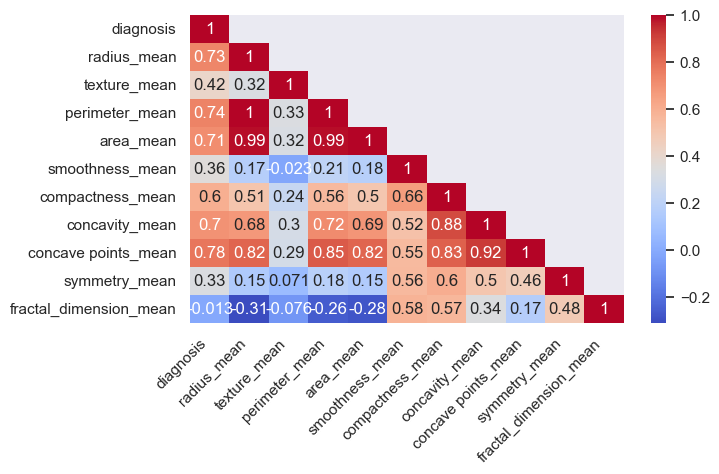

In [66]:
# Correlation matrix for means
corr_means = mean_features_df.corr()

# Create mask that just shows bottom half of heatmap. 
mask = np.zeros_like(corr_means, dtype=bool)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot correlation heatmap from means
fig, ax = plt.subplots(figsize=(7, 4))
sns.heatmap(corr_means, annot = True, ax = ax, cmap="coolwarm", mask=mask)
plt.xticks(rotation=45, ha='right');

In [67]:
# Create a list of feature highly correlated with diagnosis. 
# Drop "perimeter_mean" - It and radius mean are highly correlated
# Drop "area_mean" - It and radius mean are highly correlated
# We will use later in the notebook
prediction_vars1 = ["radius_mean", "compactness_mean", "concavity_mean", "concave points_mean"]
prediction_vars1

['radius_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean']

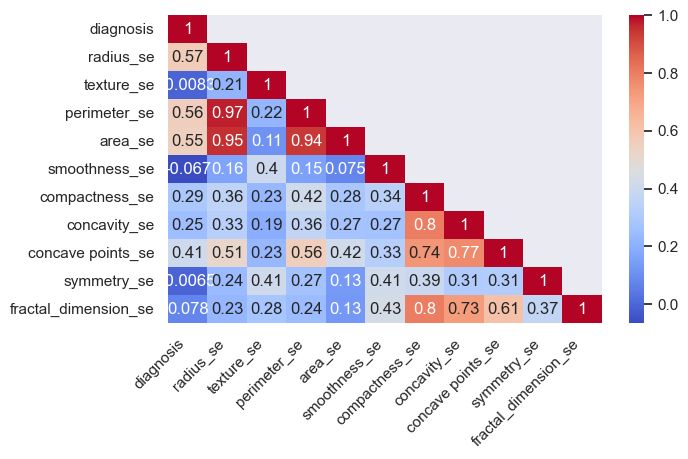

In [68]:
# Repeat for SE features
corr_se = se_features_df.corr()
mask = np.zeros_like(corr_se, dtype=bool)
mask[np.triu_indices_from(mask, k=1)] = True
fig, ax = plt.subplots(figsize=(7, 4))
sns.heatmap(corr_se, annot = True, ax = ax, cmap="coolwarm", mask=mask)
plt.xticks(rotation=45, ha='right');

In [69]:
prediction_vars2 = []
prediction_vars2

[]

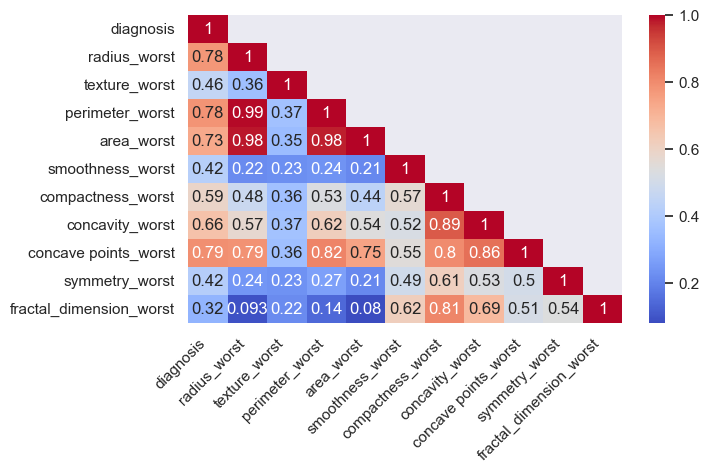

In [70]:
# Repeat for Worst features
corr_worst = worst_features_df.corr()
mask = np.zeros_like(corr_worst, dtype=bool)
mask[np.triu_indices_from(mask, k=1)] = True
fig, ax = plt.subplots(figsize=(7, 4))
sns.heatmap(corr_worst, annot = True, ax = ax, cmap="coolwarm", mask=mask)
plt.xticks(rotation=45, ha='right');

In [71]:
# Drop "perimeter worst" - It and "area_worst" are highly correlated
# Drop "area worst" - It and "area"_worst" are highly correlated
prediction_vars3 = ["radius_worst", "concavity_worst", "concave points_worst"]
prediction_vars3

['radius_worst', 'concavity_worst', 'concave points_worst']

In [72]:
prediction_vars = prediction_vars1 + prediction_vars2 + prediction_vars3
prediction_vars

['radius_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_worst',
 'concavity_worst',
 'concave points_worst']

<h2 style="color: #001a79;">Literature Review - Machine Learning on the BCW (Diagnostic) Dataset
</h2>

<hr style="border-top: 1px solid #001a79;" />

"<a href="https://www.youtube.com/watch?v=elojMnjn4kk&list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A&index=1&ab_channel=DataSchool" target="_blank">Machine Learning</a> *is the semi-automated extraction of knowledge from data".*

There are two types of machine learning:
1. Supervised learning - using labeled datasets to train algorithms to classify or predict outcomes accurately. 
2. Unsupervised learning - extracting structure from data without pre-existing labels i.e. segmenting into cathegories with similiar responses.  

In the case of the BCW (Diagnostic) dataset supervised learning is used to predict the diagnosis of a given patient (Benign - 0 or Malignant - 1) by training a model on the tumors features. 

### Techniques and Classifiers Used

#### K-Nearest Neighbours (KNN)

One of the supervised learning strategies used for solving the Breast Cancer classification problem is the K-nearest neighbour method. 

K-Nearest Neighbours takes in a value k, where k is greater than 0, and searches for k number of observations nearest the unknown breast cancer sample. The predicted classification for the unknown breast cancer sample is based of the most popular breast cancer diagnosis of the k nearest obeservations. 

The example below shows a classification problem with two classes A and B. K is set to 7 in the KNN algorithm. There are 3 near neighbours that are in class A and 4 in class B. As the majority are in class B, the point is classified as class B. 

Note: K is usually set to odd numbers to avoid even results. 

<img src="content/KNN.PNG" alt="Breast cancer" style="width: 850px;"/> 

Source: <a href="https://www.ibm.com/topics/knn" target="_blank">IBM: K-Nearest Neighbours Algorithm</a>

#### Support Vector Machines

SVMs perform the classification by drawing a hyperplane (i.e, a line in 2D or a plane in 3D). This splits the points so that all points of one class are on one side of the hyperplane and all points of the other class are on the other side of the hyperplane. While there could be multiple hyperplanes SVM, tries to find the one that best separates the two categories (optimal hyperplane). Finding this line maximises the distance to the points in either class (maximum margin) and the points that fall exactly on this line are called the supporting vectors (Shaded points below).  

<img src="content/svm.PNG" alt="Breast cancer" style="width: 350px;"/> 

Sources: <br>
<a href="https://www.youtube.com/watch?v=_YPScrckx28&ab_channel=VisuallyExplained" target="_blank">
Visually Explained (YouTube): Support Vector Machine (SVM) in 2 minutes</a><br>
<a href="https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47" target="_blank">Towards Data Science: Support Vector Machine</a><br>

#### Decision Trees

A decision tree is a binary tree that recursively splits the dataset using decision nodes until left with just pure leaf nodes (i.e the data with only one type of class). 

The root node is where the decision tree starts. It represents the entire dataset, which further gets divided into two or more homogeneous sets. Splitting is the process of dividing the decision node/root node into sub-nodes according to the given conditions. Leaf nodes are the final output node, and the tree cannot be segregated further after getting a leaf node. 

<img src="content/decision-tree.PNG" alt="Breast cancer" style="width: 450px;"/> 

Below shows an example of a decision tree for the BCW (Diagnostic) Dataset. The root decision node is whether `area_worst` is less than or equal to, or greater than 880.8. This is divided into two sub-trees. If we look at the sub-tree where `area_worst` is greater than 880.8, `concavity_mean` is the next decision node. If `concavity_mean` is greater than 0.0716, the result is a Malignant leaf node and this path ends. If `concavity_mean` is less than or equal to 0.0716, `texture_mean` is the next decision node. If `texture_mean` is less than or equal to 19.54 the result is a Benign leaf node. If `texture_mean` is greater than 19.54, the result is a Malignant leaf node. 

<img src="content/decision-tree-bc.PNG" alt="Breast cancer" style="width: 450px;"/> 

Sources: <br>
<a href="https://www.javatpoint.com/machine-learning-decision-tree-classification-algorithm" target="_blank">Java T Point: Decision Trees</a> <br>
<a href="https://www.irjet.net/archives/V5/i3/IRJET-V5I3654.pdf" target="_blank">IRJET: Diagnosis of Breast Cancer using Decision Tree Models and SVM</a>

### Algorithms Performance 

#### Confusion Matrix

A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model.

<img src="content/confusion-matrix.jpg" alt="Breast cancer" style="width: 550px;"/> 

**TP** - The predicted value is positive and the actual value is positive <br>
**TN** - The predicted value is negative and the actual value is negative

**FP** - The predicted value is positive but the actual value is negative (Type I error) <br>
**FN** - The predicted value is negative but the actual value is positive (Type II error)

A good model is one which has high TP and TN rates, while low FP and FN rates (high accuracy).

In [73]:
# Given a 2x2 comfusion matrix return it's values. 
def getConfusionValues(cm):
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]
    return TP, FP, FN, TN 

#### Accuracy

Accuracy simply measures how often the classifier makes the correct prediction. It’s the ratio between the number of correct predictions and the total number of predictions.

$$Accuracy = \frac{TP + TN}{TP + FP + FN + TN}$$

In [236]:
def getAccuracy(vals):
    acc = (vals[0] + vals[3]) / (vals[0] + vals[1] + vals[2] + vals[3])
    return acc

In [237]:
# Returns accuracy. 
def performance(vals, alg):
    accuracy = getAccuracy(vals) * 100
    
    print(f'{alg} Accuracy: {accuracy:.2f}%')

Sources: <br> 
<a href="https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/" target="_blank">Analytics Vidhya: Confusion Matrx</a> <br>
<a href="https://www.sciencedirect.com/topics/mathematics/confusion-matrix" target="_blank">Science Direct: Confusions Matrix</a>

### Techniques and Classifiers Performance

#### K-Nearest Neighbours (KNN)

Results: <a href="https://dergipark.org.tr/tr/download/article-file/615107" target="_blank">ISVOS Journal 2018 - Classification and Diagnostic Prediction of Breast Cancers via Different Classifiers (Ahmet Saygılı)</a>

In [238]:
knn1 = [[204, 8], 
        [8, 349]]

In [239]:
knn3 = [[206, 6], 
        [9, 348]]

In [240]:
knn5 = [[204, 8], 
        [9, 348]]

In [241]:
performance(getConfusionValues(knn1), 'KNN where k = 1')

KNN where k = 1 Accuracy: 97.19%


In [242]:
performance(getConfusionValues(knn3), 'KNN where k = 3')

KNN where k = 3 Accuracy: 97.36%


In [243]:
performance(getConfusionValues(knn5), 'KNN where k = 5')

KNN where k = 5 Accuracy: 97.01%


The KNN classification model was most sucessful where k = 3 (97.36% accuracy). This is followed by k = 1 (97.19% accuracy) and k = 1 (97.01% accuracy). 

#### Support Vector Machines

Results: <a href="https://dergipark.org.tr/tr/download/article-file/615107" target="_blank">ISVOS Journal 2018 - Classification and Diagnostic Prediction of Breast Cancers via Different Classifiers (Ahmet Saygılı)</a>

In [244]:
svm = [[205, 7], 
        [4, 353]]

In [245]:
performance(getConfusionValues(svm), 'SVM')

SVM Accuracy: 98.07%


The SVM classification model was most sucessful overall with 98.07% accuracy. 

#### Decision Trees

<a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8993572/" target="_blank">NLM: Diagnosis of Breast Cancer Pathology on the Wisconsin Dataset with the Help of Data Mining Classification and Clustering Techniques (Walid Theib Mohammad, Ronza Teete, Heyam Al-Aaraj, Yousef Saleh Yousef Rubbai, Majd Mowafaq Arabyat)</a>

In [246]:
DT = [[195, 17], 
        [24, 333]]

In [247]:
performance(getConfusionValues(DT), 'Decision Trees')

Decision Trees Accuracy: 92.79%


The Decision Tree classification model was least sucessful overall with 92.79% accuracy. 

### Plot Performance 

In [248]:
knn1_acc = round(getAccuracy(getConfusionValues(knn1)) * 100, 2)
knn3_acc = round(getAccuracy(getConfusionValues(knn3)) * 100, 2)
knn5_acc = round(getAccuracy(getConfusionValues(knn5)) * 100, 2)
svm_acc = round(getAccuracy(getConfusionValues(svm)) * 100, 2)
DT_acc = round(getAccuracy(getConfusionValues(DT)) * 100, 2)

In [249]:
accuracy_scores = {
    "KNN\n k=1": knn1_acc, 
    "KNN\n k=3": knn3_acc, 
    "KNN\n k=5": knn5_acc, 
    "SVM": svm_acc, 
    "Decision\n Tree": DT_acc, 
}

sorted_accuracy_scores = {}
sorted_keys = sorted(accuracy_scores, key=accuracy_scores.get)

for w in sorted_keys:
    sorted_accuracy_scores[w] = accuracy_scores[w]
    
sorted_accuracy_scores

{'Decision\n Tree': 92.79,
 'KNN\n k=5': 97.01,
 'KNN\n k=1': 97.19,
 'KNN\n k=3': 97.36,
 'SVM': 98.07}

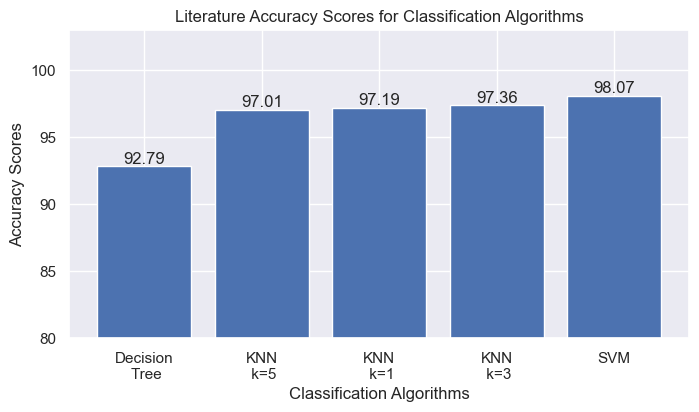

In [250]:
# Plot the probabilities for each sum outcome of 2 dice. 
fig, ax = plt.subplots(figsize=(8,4))
ax.set_xlabel("Classification Algorithms")
ax.set_ylabel("Accuracy Scores")
ax.set_title("Literature Accuracy Scores for Classification Algorithms")

# Plot from dictionary. 
barplot = plt.bar(range(len(sorted_accuracy_scores)), list(sorted_accuracy_scores.values()), align='center')
plt.xticks(range(len(sorted_accuracy_scores)), list(sorted_accuracy_scores.keys()))
plt.ylim(bottom = 80)
plt.bar_label(barplot, labels = sorted_accuracy_scores.values());

<h2 style="color: #001a79;">My Own Machine Learning on the BCW (Diagnostic) Dataset
</h2>

<hr style="border-top: 1px solid #001a79;" />

### Set up data for machine learning 

In [251]:
# Remove diagnosis (Y) from df and set as new dataframe X
X = df.drop(["diagnosis"], axis=1)
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [252]:
# Set diagnosis collumn to be Y. 
Y = df["diagnosis"]
Y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [253]:
from sklearn.model_selection import train_test_split
# 85% training data
# 15% testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 1)

#### Remove features that we found earlier not to be correlated with diagnosis and that were highly correlated with one another. 

In [254]:
# Ammend features 
x_train = x_train[prediction_vars]
x_train.head()

,radius_mean,compactness_mean,concavity_mean,concave points_mean,radius_worst,concavity_worst,concave points_worst
501,13.82,0.16810,0.13570,0.06759,16.01,0.3381,0.15210
545,13.62,0.06747,0.02974,0.02443,15.35,0.1049,0.07174
62,14.25,0.20080,0.21350,0.08653,17.67,0.6922,0.17850
344,11.71,0.07281,0.04006,0.03250,13.06,0.1087,0.07864
457,13.21,0.05205,0.02772,0.02068,14.35,0.1390,0.06005


In [255]:
# Ammend features 
x_test = x_test[prediction_vars]
x_test.head()

,radius_mean,compactness_mean,concavity_mean,concave points_mean,radius_worst,concavity_worst,concave points_worst
421,14.69,0.18360,0.14500,0.06300,16.46,0.3219,0.11080
47,13.17,0.12310,0.12260,0.07340,15.67,0.5006,0.20880
292,12.95,0.07943,0.06155,0.03370,13.74,0.2241,0.10560
186,18.31,0.08468,0.08169,0.05814,21.31,0.3538,0.15710
414,15.13,0.04605,0.04686,0.02739,17.26,0.1547,0.06575


### Techniques and Classifiers Used

#### K-Nearest Neighbours (KNN)

Normalizing data on the same scale is highly recommended for KNN. Generally, the normalization range considered between 0 and 1. 

In [256]:
# Normalise training data. 
normalized_x_train = (x_train - x_train.min()) / (x_train.max() - x_train.min())
normalized_x_train.head()

,radius_mean,compactness_mean,concavity_mean,concave points_mean,radius_worst,concavity_worst,concave points_worst
501,0.323678,0.456168,0.317948,0.335934,0.287442,0.270048,0.522680
545,0.314213,0.147506,0.069681,0.121421,0.263963,0.083786,0.246529
62,0.344030,0.556469,0.500234,0.430070,0.346496,0.552875,0.613402
344,0.223816,0.163886,0.093861,0.161531,0.182497,0.086821,0.270241
457,0.294808,0.100209,0.064948,0.102783,0.228388,0.111022,0.206357


<a href="https://stackoverflow.com/questions/26414913/normalize-columns-of-a-dataframe/41532180#41532180" target="_blank">Stackoverflow: Normalize columns of a dataframe</a>

In [257]:
# Normalise training data. 
normalized_x_test = (x_test - x_test.min()) / (x_test.max() - x_test.min())

KNN is not suitable for the large dimensional data. In such cases, dimension needs to reduce to improve the performance (already removed features).

<a href="https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn" target="_blank">DataCamp: KNN Classification Tutorial using Scikit-learn - How to improve KNN?</a>

#### K = 1

In [258]:
from sklearn.neighbors import KNeighborsClassifier

In [259]:
# Train model
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(normalized_x_train, y_train)

# Get predictions
knn1_preds = knn1.predict(normalized_x_test)

In [260]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get confusion matrix 
knn1_cm = confusion_matrix(y_test, knn1_preds, labels=knn1.classes_)

#### K = 3

In [261]:
# Train model
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(normalized_x_train, y_train)

# Get predictions
knn3_preds = knn3.predict(normalized_x_test)

In [262]:
# Get confusion matrix 
knn3_cm = confusion_matrix(y_test, knn3_preds, labels=knn3.classes_)

#### K = 5

In [263]:
# Train model
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(normalized_x_train, y_train)

# Get predictions
knn5_preds = knn5.predict(normalized_x_test)

In [264]:
# Get confusion matrix 
knn5_cm = confusion_matrix(y_test, knn5_preds, labels=knn5.classes_)

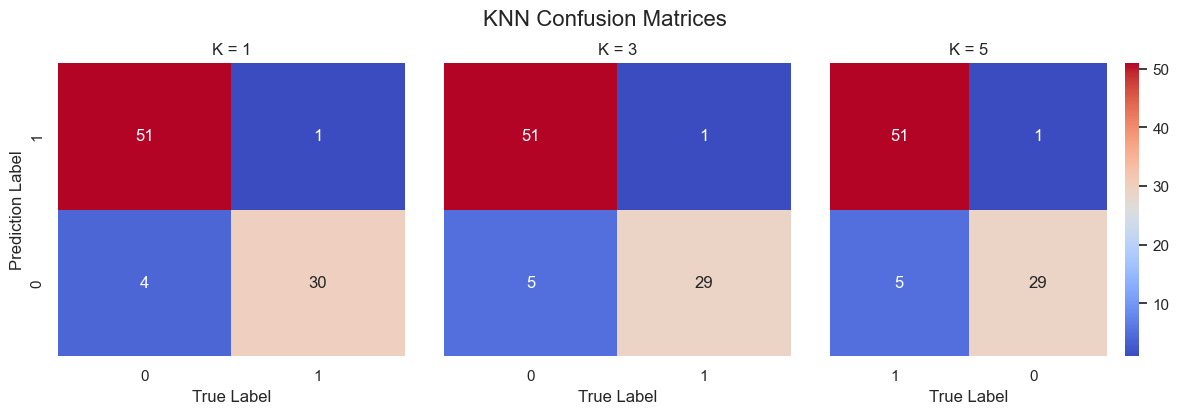

In [265]:
# Set up plot 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4),sharey=True)

# Set main title. 
fig.suptitle("KNN Confusion Matrices", fontsize=16)
fig.tight_layout()

# Plot heat maps with subtitiles. 
ax1.title.set_text('K = 1')
sns.heatmap(knn1_cm, annot=True, cmap="coolwarm", cbar=False, ax = ax1)

ax2.title.set_text('K = 3')
sns.heatmap(knn3_cm, annot=True, cmap="coolwarm", cbar=False, ax = ax2)

ax3.title.set_text('K = 5')
sns.heatmap(knn5_cm, annot=True, cmap="coolwarm", ax = ax3)

# x and y ticks
plt.yticks([1.5, 0.5], ['0', '1'], ha='right')
plt.xticks([1.5, 0.5], ['0', '1'], ha='right')

# x and y labels
ax1.set(xlabel='True Label', ylabel='Prediction Label')
ax2.set(xlabel='True Label');
ax3.set(xlabel='True Label');

In [266]:
# Get performances 
performance(getConfusionValues(knn1_cm), 'KNN where k = 1')
print("\n")
performance(getConfusionValues(knn3_cm), 'KNN where k = 3')
print("\n")
performance(getConfusionValues(knn5_cm), 'KNN where k = 5')

KNN where k = 1 Accuracy: 94.19%


KNN where k = 3 Accuracy: 93.02%


KNN where k = 5 Accuracy: 93.02%


#### Improving KNN Performances in scikit-learn Using GridSearchCV

In [267]:
from sklearn.model_selection import GridSearchCV

In [268]:
# n_neighbors: Number of neighbors 
# weights: Weight function used in prediction. 
# algorithm: Algorithm used to compute the nearest neighbors
parameters = {"n_neighbors": (1, 3, 5, 7, 9),  "weights" : ('uniform', 'distance'), "algorithm" : ('auto', 'ball_tree', 'kd_tree', 'brute')}
gridsearch1 = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch1.fit(normalized_x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': (1, 3, 5, 7, 9),
                         'weights': ('uniform', 'distance')})

In [269]:
# Get best parameters 
gridsearch1.best_params_

{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'uniform'}

In [270]:
# Train model 
knn9op = KNeighborsClassifier(n_neighbors=9, algorithm="auto", weights="uniform")
knn9op.fit(normalized_x_train, y_train)

# Get predictions
knn9op_preds = knn9op.predict(normalized_x_test)

In [271]:
# Get confusion matrix 
knn9op_cm = confusion_matrix(y_test, knn9op_preds, labels=knn9op.classes_)

In [272]:
# Get performance
performance(getConfusionValues(knn9op_cm), 'KNN where k = 9')

KNN where k = 9 Accuracy: 91.86%


Source: <a href="https://realpython.com/knn-python/#tune-and-optimize-knn-in-python-using-scikit-learn" target="_blank">Real Python: The k-Nearest Neighbors (KNN) Algorithm in Python</a>

### Plot Performance

In [273]:
# Get accuracies as a percentage 
my_knn1_acc = round(getAccuracy(getConfusionValues(knn1_cm)) * 100, 2)
my_knn3_acc = round(getAccuracy(getConfusionValues(knn3_cm)) * 100, 2)
my_knn5_acc = round(getAccuracy(getConfusionValues(knn5_cm)) * 100, 2)
my_knn9_acc = round(getAccuracy(getConfusionValues(knn9op_cm)) * 100, 2)

In [274]:
# Create dict with results for literature and my results 
both_knn_accuracy_scores = {
    "KNN\n k=1": [knn1_acc, my_knn1_acc], 
    "KNN\n k=3": [knn3_acc, my_knn3_acc], 
    "KNN\n k=5": [knn5_acc, my_knn5_acc], 
    "KNN\n k=9": [0, my_knn9_acc]
}

In [275]:
# Sort by literature results 
both_sorted_knn_accuracy_scores = {}
sorted_keys = sorted(both_knn_accuracy_scores, key=both_knn_accuracy_scores.get)

for w in sorted_keys:
    both_sorted_knn_accuracy_scores[w] = both_knn_accuracy_scores[w]
    
both_sorted_knn_accuracy_scores

{'KNN\n k=9': [0, 91.86],
 'KNN\n k=5': [97.01, 93.02],
 'KNN\n k=1': [97.19, 94.19],
 'KNN\n k=3': [97.36, 93.02]}

In [276]:
# Separate results and labels for plot 
literature_scores = [elem[0] for elem in both_sorted_knn_accuracy_scores.values()]
my_scores = [elem[1] for elem in both_sorted_knn_accuracy_scores.values()]
labels = [elem for elem in both_sorted_knn_accuracy_scores.keys()]
labels

['KNN\n k=9', 'KNN\n k=5', 'KNN\n k=1', 'KNN\n k=3']

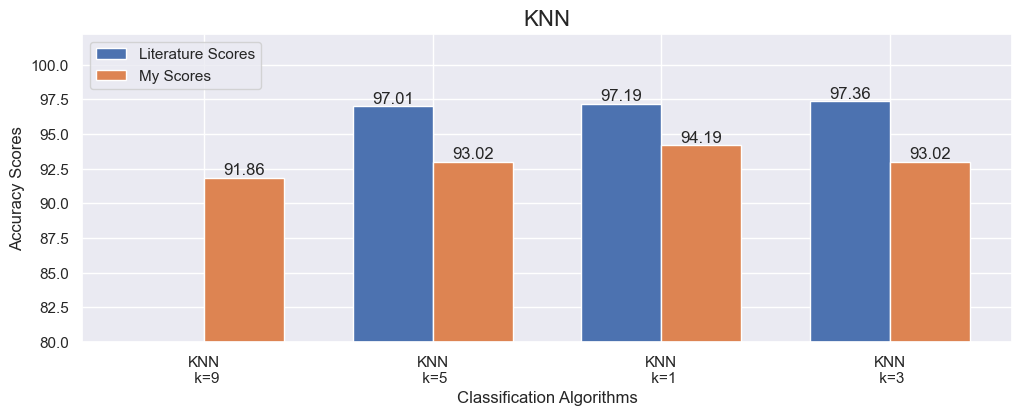

In [277]:
# Set up plot
fig, ax = plt.subplots(figsize=(12,4))

# Index through number of sets of bars 
index = np.arange(4)
bar_width = 0.35

# Plot literature vs my scores
fig1 = plt.bar(index, literature_scores, align='edge', width=bar_width, label='Literature Scores')
fig2 = plt.bar(index + bar_width, my_scores, align='edge', width=bar_width, label='My Scores')

# Legend
plt.legend(loc='upper left')

# Position of x bars and labels
plt.xticks(np.arange(len(literature_scores)))
ax.set_xticks(index + bar_width)
ax.set_xticklabels(labels)

# Rescales y axis to begin at 80 
plt.ylim(bottom = 80)

# Scores on top of bars
plt.bar_label(fig1, labels = literature_scores);
plt.bar_label(fig2, labels = my_scores);

# Labels and titles 
ax.set_xlabel("Classification Algorithms")
ax.set_ylabel("Accuracy Scores")
ax.set_title("KNN", fontsize = 16);

#### Support Vector Machines

Normalizing data is also recommended for SVM. This time with a mean of 0. 

In [278]:
# Normalise train data
normalized2_x_train = (x_train - x_train.mean()) / (x_train.std())
normalized2_x_train.head()

,radius_mean,compactness_mean,concavity_mean,concave points_mean,radius_worst,concavity_worst,concave points_worst
501,-0.087417,1.197436,0.572230,0.475159,-0.060345,0.304487,0.556199
545,-0.143461,-0.706839,-0.735757,-0.627122,-0.194146,-0.796697,-0.644857
62,0.033078,1.816235,1.532605,0.958875,0.276187,1.976568,0.950771
344,-0.678682,-0.605788,-0.608365,-0.421019,-0.658398,-0.778753,-0.541730
457,-0.258351,-0.998640,-0.760692,-0.722895,-0.396876,-0.635675,-0.819575


In [279]:
# Normalise test data
normalized2_x_test = (x_test - x_test.mean()) / (x_test.std())
normalized2_x_test.head()

,radius_mean,compactness_mean,concavity_mean,concave points_mean,radius_worst,concavity_worst,concave points_worst
421,0.179439,1.550499,0.818386,0.390793,0.095707,0.302413,-0.037863
47,-0.283693,0.406014,0.509029,0.672033,-0.090121,1.238343,1.622317
292,-0.350726,-0.420096,-0.334108,-0.401547,-0.544106,-0.209808,-0.125954
186,1.282425,-0.320781,-0.055963,0.259367,1.236548,0.469488,0.746487
414,0.313504,-1.051549,-0.536985,-0.572184,0.283887,-0.573286,-0.801037


We will use the same features we reduced to. 

In [280]:
from sklearn.svm import SVC

# Train model 
svm = SVC()
svm.fit(normalized2_x_train, y_train)

# Get predictions
svm_preds = svm.predict(normalized2_x_test)

In [281]:
# Get confusion matrix 
svm_cm = confusion_matrix(y_test, svm_preds, labels=svm.classes_)

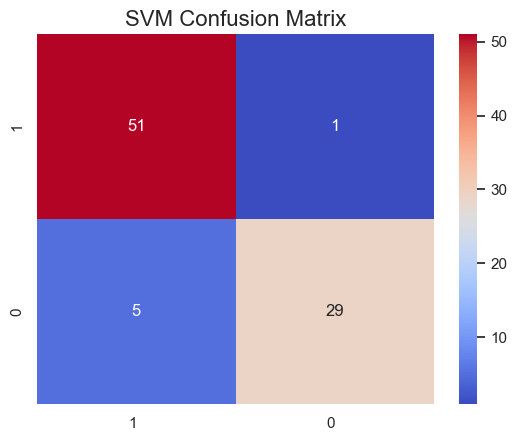

In [282]:
# Plot heat map 
sns.heatmap(svm_cm, annot=True, cmap="coolwarm")

plt.yticks([1.5, 0.5], ['0', '1'], ha='right')
plt.xticks([1.5, 0.5], ['0', '1'], ha='right')

ax.set(xlabel='True Label', ylabel='Prediction Label')

plt.title("SVM Confusion Matrix", fontsize=16);

In [283]:
# Get performance 
performance(getConfusionValues(svm_cm), 'Support Vector Machine')

Support Vector Machine Accuracy: 93.02%


#### Improving KNN Performances in scikit-learn Using GridSearchCV

In [284]:
# 'C' - The value of C is inversely proportional to the strength of the regularization.
# 'gamma' - the kernel coefficient for rbf, poly, and sigmoid. 
# 'kernal' - function transforms the training dataset into higher dimensions to make it linearly separatable. 
parameters = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': ['scale', 'auto'],
              'kernel': ['linear', 'rbf', 'poly']} 

In [285]:
gridsearch = GridSearchCV(svm, parameters)
gridsearch.fit(normalized2_x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [286]:
# Get best parameters 
gridsearch.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [287]:
# Train model 
svm_op = SVC(C = 10, gamma = 'scale', kernel = 'rbf')
svm_op.fit(normalized2_x_train, y_train)

# Get predictions 
svm_op_preds = svm_op.predict(normalized2_x_test)

In [302]:
# Get confusion matrix
svm_op_cm = confusion_matrix(y_test, svm_op_preds, labels=svm_op.classes_)

In [303]:
# Get performance 
performance(getConfusionValues(svm_op_cm), 'SVM')

SVM Accuracy: 93.02%


Source: <a href="https://medium.com/grabngoinfo/support-vector-machine-svm-hyperparameter-tuning-in-python-a65586289bcb" target="_blank">Medium: Support Vector Machine (SVM) Hyperparameter Tuning In Python</a>

### Plot Performance

In [296]:
# Get accuracies as percentages 
my_svm_acc = round(getAccuracy(getConfusionValues(svm_cm)) * 100, 2)
my_svmop_acc = round(getAccuracy(getConfusionValues(svm_op_cm)) * 100, 2)

In [297]:
# Create dict with results for literature and my results 
both_svm_accuracy_scores = {
    "SVM": [svm_acc, my_svm_acc], 
    "SVM\n Optimizer": [0, my_svmop_acc]
}

both_svm_accuracy_scores

{'SVM': [98.07, 93.02], 'SVM\n Optimizer': [0, 93.02]}

In [298]:
# Sort by literature results 
both_sorted_svm_accuracy_scores = {}
sorted_keys = sorted(both_svm_accuracy_scores, key=both_svm_accuracy_scores.get)

for w in sorted_keys:
    both_sorted_svm_accuracy_scores[w] = both_svm_accuracy_scores[w]
    
both_sorted_svm_accuracy_scores

{'SVM\n Optimizer': [0, 93.02], 'SVM': [98.07, 93.02]}

In [299]:
# Separate results and labels for plot 
literature_scores2 = [elem[0] for elem in both_sorted_svm_accuracy_scores.values()]
my_scores2 = [elem[1] for elem in both_sorted_svm_accuracy_scores.values()]
labels2 = [elem for elem in both_sorted_svm_accuracy_scores.keys()]
labels2

['SVM\n Optimizer', 'SVM']

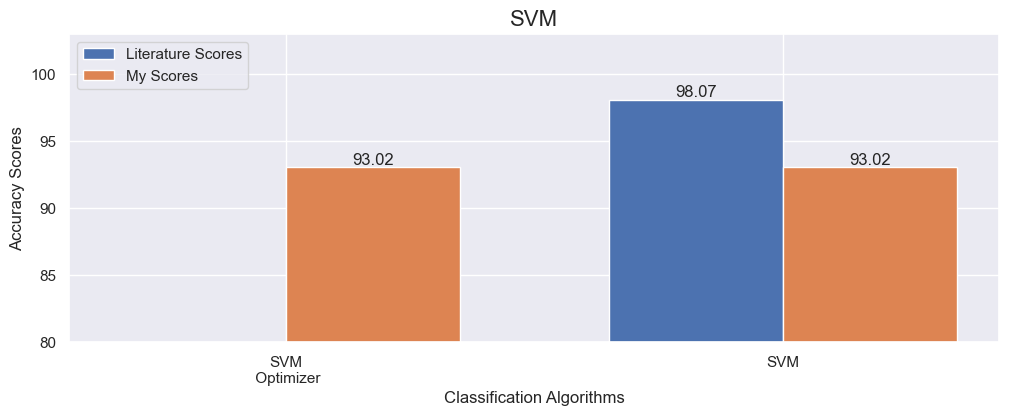

In [300]:
# Set up plot
fig, ax = plt.subplots(figsize=(12,4))

# Index through number of sets of bars 
index = np.arange(2)
bar_width = 0.35

# Plot literature vs my scores
fig1 = plt.bar(index, literature_scores2, align='edge', width=bar_width, label='Literature Scores')
fig2 = plt.bar(index + bar_width, my_scores2, align='edge', width=bar_width, label='My Scores')

# Legend
plt.legend(loc='upper left')

# Position of x bars and labels
plt.xticks(np.arange(len(literature_scores2)))
ax.set_xticks(index + bar_width)
ax.set_xticklabels(labels2)

# Rescales y axis to begin at 80 
plt.ylim(bottom = 80)

# Scores on top of bars
plt.bar_label(fig1, labels = literature_scores2);
plt.bar_label(fig2, labels = my_scores2);

# Labels and titles 
ax.set_xlabel("Classification Algorithms")
ax.set_ylabel("Accuracy Scores")
ax.set_title("SVM", fontsize = 16);

#### Decision Trees

In [301]:
from sklearn import tree
# Train model 
dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)

# Get predictions
dt_preds = dt.predict(x_test)

In [199]:
# Get confusion matrix 
dt_cm = confusion_matrix(y_test, dt_preds, labels=dt.classes_)

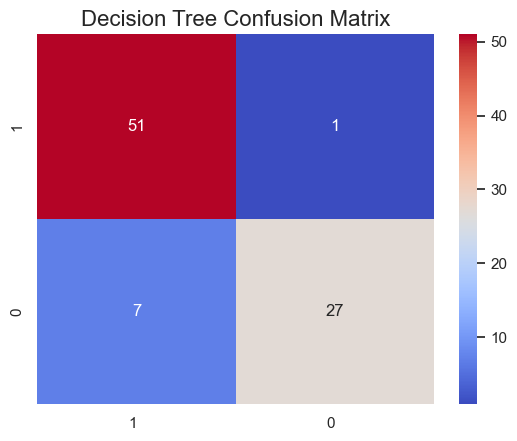

In [200]:
# Plot heatmap 
sns.heatmap(dt_cm, annot=True, cmap="coolwarm")

plt.yticks([1.5, 0.5], ['0', '1'], ha='right')
plt.xticks([1.5, 0.5], ['0', '1'], ha='right')

ax.set(xlabel='True Label', ylabel='Prediction Label')

plt.title("Decision Tree Confusion Matrix", fontsize=16);

In [208]:
# Get performance
performance(getConfusionValues(dt_cm), 'Decision Tree')

Decision Tree Accuracy: 90.70%


#### Improving KNN Performances in scikit-learn Using GridSearchCV

In [304]:
# criterion - the function to measure the quality of a split.
# splitter - strategy used to choose the split at each node. 
parameters = {'criterion': ("gini", "entropy", "log_loss"), 
             'splitter': ("best", "random")} 

In [305]:
gridsearch = GridSearchCV(tree.DecisionTreeClassifier(), parameters)
gridsearch.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'splitter': ('best', 'random')})

In [306]:
# Best paremeters 
gridsearch.best_params_

{'criterion': 'log_loss', 'splitter': 'random'}

In [308]:
# Train model 
dt_op = tree.DecisionTreeClassifier(criterion='log_loss', splitter='random')
dt_op.fit(x_train, y_train)

# Get predictions
dt_op_preds = dt_op.predict(x_test)

In [309]:
# Get confusion matrix 
dt_op_cm = confusion_matrix(y_test, dt_op_preds, labels=dt_op.classes_)

In [310]:
# Get performance 
performance(getConfusionValues(dt_op_cm), 'Decision Tree Optimised')

Decision Tree Optimised Accuracy: 90.70%


### Plot Performance

In [311]:
# Get accuracies as percentages 
my_dt_acc = round(getAccuracy(getConfusionValues(dt_cm)) * 100, 2)
my_dtop_acc = round(getAccuracy(getConfusionValues(dt_op_cm)) * 100, 2)

In [312]:
# Create dict with results for literature and my results 
both_dt_accuracy_scores = {
    "Decision Tree": [DT_acc, my_dt_acc], 
    "Decision Tree\n Optimizer": [0, my_dtop_acc]
}

both_dt_accuracy_scores

{'Decision Tree': [92.79, 90.7], 'Decision Tree\n Optimizer': [0, 90.7]}

In [313]:
# Sort by literature results 
both_sorted_dt_accuracy_scores = {}
sorted_keys = sorted(both_dt_accuracy_scores, key=both_dt_accuracy_scores.get)

for w in sorted_keys:
    both_sorted_dt_accuracy_scores[w] = both_dt_accuracy_scores[w]
    
both_sorted_dt_accuracy_scores

{'Decision Tree\n Optimizer': [0, 90.7], 'Decision Tree': [92.79, 90.7]}

In [314]:
# Separate results and labels for plot 
literature_scores3 = [elem[0] for elem in both_sorted_dt_accuracy_scores.values()]
my_scores3 = [elem[1] for elem in both_sorted_dt_accuracy_scores.values()]
labels3 = [elem for elem in both_sorted_dt_accuracy_scores.keys()]
labels3

['Decision Tree\n Optimizer', 'Decision Tree']

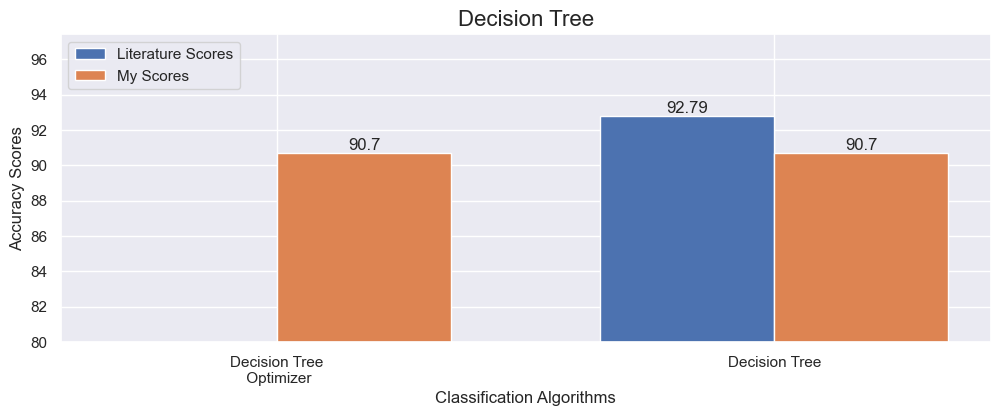

In [315]:
# Set up plot
fig, ax = plt.subplots(figsize=(12,4))

# Index through number of sets of bars 
index = np.arange(2)
bar_width = 0.35

# Plot literature vs my scores
fig1 = plt.bar(index, literature_scores3, align='edge', width=bar_width, label='Literature Scores')
fig2 = plt.bar(index + bar_width, my_scores3, align='edge', width=bar_width, label='My Scores')

# Legend
plt.legend(loc='upper left')

# Position of x bars and labels
plt.xticks(np.arange(len(literature_scores3)))
ax.set_xticks(index + bar_width)
ax.set_xticklabels(labels3)

# Rescales y axis to begin at 80 
plt.ylim(bottom = 80)

# Scores on top of bars
plt.bar_label(fig1, labels = literature_scores3);
plt.bar_label(fig2, labels = my_scores3);

# Labels and titles 
ax.set_xlabel("Classification Algorithms")
ax.set_ylabel("Accuracy Scores")
ax.set_title("Decision Tree", fontsize = 16);

<h2 style="color: #001a79;">Data Synthesis of New Tumour Datapoints</h2>

<hr style="border-top: 1px solid #001a79;" />

### Synthetic Data

Synthetic data is any information manufactured artificially which does not represent events or objects in the real world. Synthetic data is the data created via a computer to increase the size of our training data or introduce changes in the data that we would like our model to handle in the future. Generative models such as the Generative Adversarial Network (GANs) is good example of a computer program that generate synthetic data. Given the BCW dataset is quite a small dataset, more data can be synthesised to help train and test machine learning models. 

To synthesis more data points you would need to use a model that models the real data. 

https://datagen.tech/guides/synthetic-data/synthetic-data/

https://www.medrxiv.org/content/10.1101/2020.10.09.20210138v1.full